In [22]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [6]:
import pandas as pd
import sklearn 
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
%matplotlib inline
#Read and format the data
data = pd.read_csv('IndexFutures.txt', delimiter='@')
headerList = pd.read_excel('DataHeader.xlsx')
data.columns = headerList.columns.values

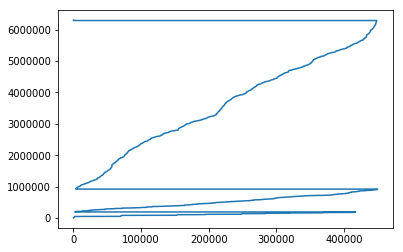

In [7]:
data.sort_values(['Publish Counter'], inplace=True)
data.TTQ.plot()

Sanity check to ensure that the data is in correct order.

In [22]:
#data.index= pd.to_datetime(data[])
data.columns.values
len(data['System Time'].unique())
len(data['Processed Time'].unique())
len(data)
data.index = pd.to_datetime(data['Processed Time'])

array([u'EsteeId', u'LTP', u'LTQ', u'LTT', u'Bid Price', u'Bid Quantity',
       u'Ask Price', u'Ask Quantity', u'Bid Price 2', u'Bid Quantity 2',
       u'Ask Price 2', u'Ask Quantity 2', u'Bid Price 3',
       u'Bid Quantity 3', u'Ask Price 3', u'Ask Quantity 3',
       u'Bid Price 4', u'Bid Quantity 4', u'Ask Price 4',
       u'Ask Quantity 4', u'Bid Price 5', u'Bid Quantity 5',
       u'Ask Price 5', u'Ask Quantity 5', u'VWAP', u'System Time', u'TTQ',
       u'ATP', u'TTV', u'TBQ', u'TSQ', u'OI', u'Processed Time',
       u'TickType', u'MsgType', u'BCSequence Number', u'Receive Counter',
       u'Publish Counter', u'Receive by DL Counter', u'BidAskChange Flag'],
      dtype=object)

218345

233746

449844

Processed time has more unique entries than system time, so we index using the former

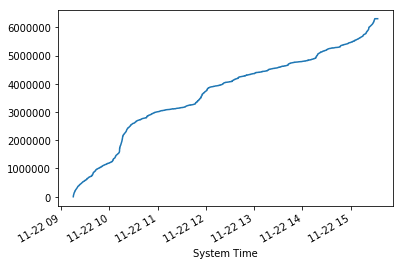

In [15]:
#Change the index to the SystemTime
#Order of the data would remain unaffected
data.index = pd.to_datetime(data['Processed Time'])
data['TTQ'].plot()

In [24]:
#Resample the data to a 500ms time frame- replicating the paper as it is
#data.head(10)
resampledDF = data.resample('500L',closed = 'left', label='right', how = 'last')

#Exlcude first and last 30 seconds of trade data
import datetime
openTime  = datetime.time(9,15,30)
closeTime = datetime.time(15,29,30)
resampledDF['TempTime'] = resampledDF.index
resampledDF['TempTime'] = resampledDF['TempTime'].apply( lambda x: x.time() )
resampledDF = resampledDF[(resampledDF.TempTime >= openTime)&(resampledDF.TempTime <= closeTime)]

#Number of instances where there is data within the 1 second window
testDF = resampledDF.dropna()
NACount = len(resampledDF) - len(testDF)

print('Nb of NA count in the data are %f'%(NACount))

#Fill all the NA values with the last observed values
resampledDF = resampledDF.ffill()
#resampledDF.dropna(inplace=True)
resampledDF.head()
#resampledDF.to_csv('ResampledFutures1Test.csv')

Nb of NA count in the data are 9447.000000


,EsteeId,LTP,LTQ,LTT,Bid Price,Bid Quantity,Ask Price,Ask Quantity,Bid Price 2,Bid Quantity 2,...,OI,Processed Time,TickType,MsgType,BCSequence Number,Receive Counter,Publish Counter,Receive by DL Counter,BidAskChange Flag,TempTime
Processed Time,,,,,,,,,,,,,,,,,,,,,
2017-11-22 09:15:30.000,IN0000000002IS0520171130,10379.5,75.0,22/11/2017 09:15:29.516000,10379.70,75.0,10381.95,375.0,10379.65,375.0,...,0.0,22/11/2017 09:15:29.995200,Exchange,0.0,0.0,2.177784e+11,2.177784e+11,0.0,6291456.0,09:15:30
2017-11-22 09:15:30.500,IN0000000002IS0520171130,10379.7,75.0,22/11/2017 09:15:30.397000,10379.65,225.0,10381.95,225.0,10379.50,525.0,...,0.0,22/11/2017 09:15:30.477200,Exchange,0.0,0.0,2.177853e+11,2.177853e+11,0.0,4194304.0,09:15:30.500000
2017-11-22 09:15:31.000,IN0000000002IS0520171130,10382.0,75.0,22/11/2017 09:15:30.892000,10380.95,150.0,10381.85,75.0,10379.70,75.0,...,0.0,22/11/2017 09:15:30.967200,Exchange,0.0,0.0,2.177924e+11,2.177924e+11,0.0,6684672.0,09:15:31
2017-11-22 09:15:31.500,IN0000000002IS0520171130,10381.7,75.0,22/11/2017 09:15:31.292000,10380.45,450.0,10381.75,675.0,10379.70,75.0,...,0.0,22/11/2017 09:15:31.489200,Exchange,0.0,0.0,2.177998e+11,2.177998e+11,0.0,32.0,09:15:31.500000
2017-11-22 09:15:32.000,IN0000000002IS0520171130,10380.0,675.0,22/11/2017 09:15:31.703000,10380.05,75.0,10381.75,75.0,10380.00,225.0,...,0.0,22/11/2017 09:15:31.968200,Exchange,0.0,0.0,2.178067e+11,2.178067e+11,0.0,6694496.0,09:15:32


Last available values are used where the no entry is found for the window

In [25]:
len(resampledDF)
resampledDF.to_csv('ResampledIndexFutures.csv')

44881

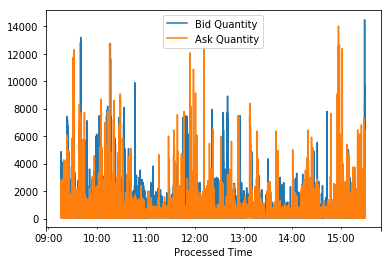

In [26]:
#resampledDF[['bidVol1', 'askVol1']].describe()
resampledDF[['Bid Quantity', 'Ask Quantity']].plot()

In [27]:
#Create Feature VOI
resampledDF['deltaVtB'] = 0*(resampledDF['Bid Price']<resampledDF['Bid Price'].shift(1)) + (resampledDF['Bid Quantity']-resampledDF['Bid Quantity'].shift(1))*(resampledDF['Bid Price']==resampledDF['Bid Price'].shift(1)) + \
                    resampledDF['Bid Quantity']*(resampledDF['Bid Price']>resampledDF['Bid Price'].shift(1))
resampledDF['deltaVtA'] = resampledDF['Ask Quantity']*(resampledDF['Ask Price']<resampledDF['Ask Price'].shift(1)) + (resampledDF['Ask Quantity']-resampledDF['Ask Quantity'].shift(1))*(resampledDF['Ask Price']==resampledDF['Ask Price'].shift(1)) + \
                    0*(resampledDF['Ask Price']>resampledDF['Ask Price'].shift(1))
resampledDF['VOI'] = resampledDF.deltaVtB - resampledDF.deltaVtA
resampledDF['DeltaVOI'] = resampledDF.VOI.diff()
#resampledDF.to_csv('ResampledFutures1.csv')

In [30]:
#Don't resample
data['deltaVtB'] = 0*(data['Bid Price']<data['Bid Price'].shift(1)) + (data['Bid Quantity']-data['Bid Quantity'].shift(1))*(data['Bid Price']==data['Bid Price'].shift(1)) + \
                    data['Bid Quantity']*(data['Bid Price']>data['Bid Price'].shift(1))
data['deltaVtA'] = data['Ask Quantity']*(data['Ask Price']<data['Ask Price'].shift(1)) + (data['Ask Quantity']-data['Ask Quantity'].shift(1))*(data['Ask Price']==data['Ask Price'].shift(1)) + \
                    0*(data['Ask Price']>data['Ask Price'].shift(1))
data['VOI'] = data.deltaVtB - data.deltaVtA
data['DeltaVOI'] = data.VOI.diff()

count    44880.000000
mean         7.601939
std        436.558354
min      -7650.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12825.000000
Name: VOI, dtype: float64

Text(0.5,1,u'VOI Plot -Resampled Data')

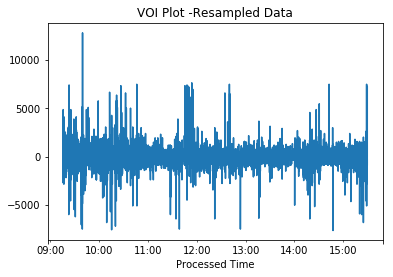

Text(0.5,1,u'Last Traded Price')

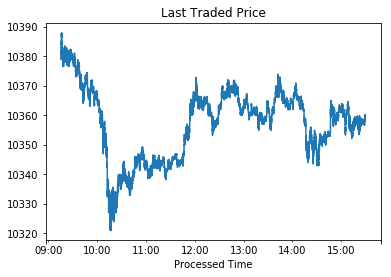

Text(0.5,1,u'Delta VOI Plot- ResampledData')

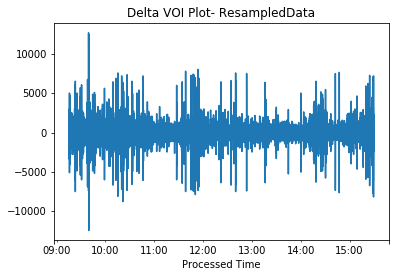

In [29]:
resampledDF.VOI.describe()

resampledDF.VOI.plot()
plt.title('VOI Plot -Resampled Data')
plt.show()
resampledDF.LTP.plot()
plt.title('Last Traded Price')
plt.show()
resampledDF.DeltaVOI.plot()
plt.title('Delta VOI Plot- ResampledData')
plt.show()

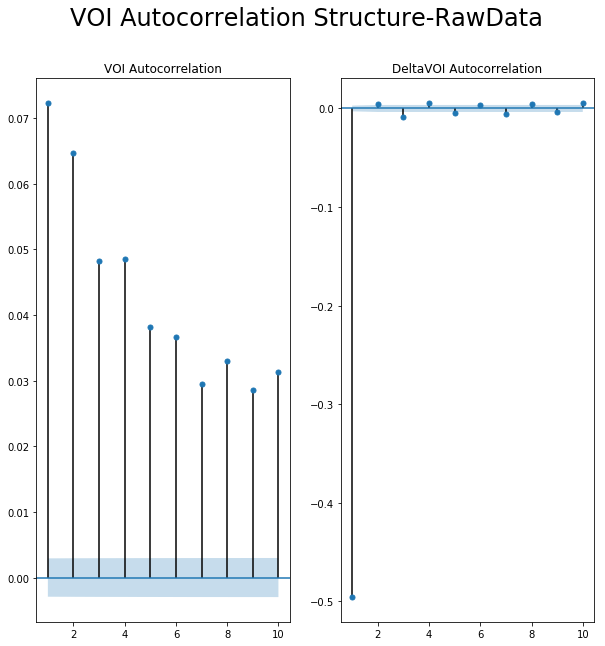

In [31]:
##ACF function for the returns at different frequencies
data.dropna(inplace=True)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1, figsize=(10,10))

ax1 = plt.subplot(121)
a=plot_acf(data.VOI, ax = ax1, lags = np.arange(1,11), \
        title = 'VOI Autocorrelation')


ax2 = plt.subplot(122)
a=plot_acf(data.DeltaVOI, ax = ax2, lags = np.arange(1,11), \
        title = 'DeltaVOI Autocorrelation')

a=plt.suptitle('VOI Autocorrelation Structure-RawData', fontsize = 24)

plt.show()

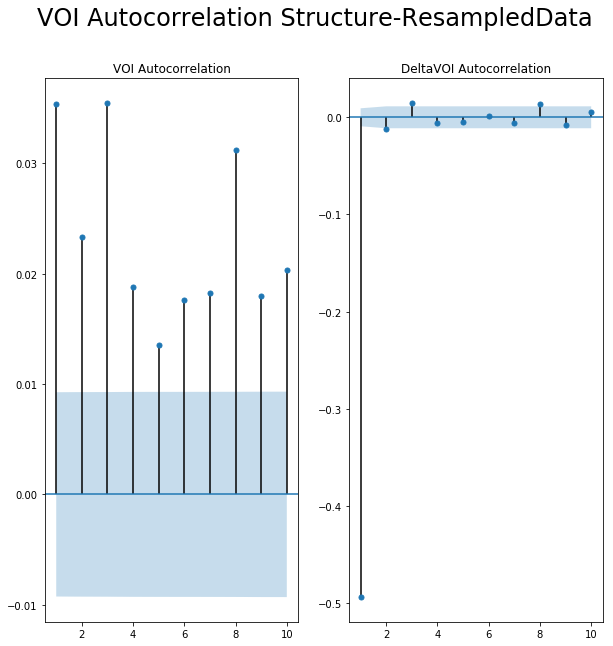

In [32]:
# ACF function for the returns at different frequencies
resampledDF.dropna(inplace=True)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1, figsize=(10,10))

ax1 = plt.subplot(121)
a=plot_acf(resampledDF.VOI, ax = ax1, lags = np.arange(1,11), \
        title = 'VOI Autocorrelation')


ax2 = plt.subplot(122)
a=plot_acf(resampledDF.DeltaVOI, ax = ax2, lags = np.arange(1,11), \
        title = 'DeltaVOI Autocorrelation')

a=plt.suptitle('VOI Autocorrelation Structure-ResampledData', fontsize = 24)

plt.show()

Figure 2.1 in Paper
When the data was resampled with a sampling rate of 1s, we are not able to reproduce the results of the paper in terms of VOI correlation structure, however that is not true in case if we consider raw tick data. The resampling rate considered in the paper is 500ms, here we go for 1000ms since 500ms was again not leading to the desired autocorrelation structure.

The time here used comes from 'SytemTime' in raw data- accurate time stamps would help.

In [33]:
resampledDF.VOI.describe()

count    44879.000000
mean         7.598766
std        436.562701
min      -7650.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12825.000000
Name: VOI, dtype: float64

In [34]:
1.*sum(resampledDF.VOI == 0) / len(resampledDF)

0.5382027228770695

Note here that for almost 50% cases, when resampled at 0.5 sec frequency, value of VOI is 0.

Text(0,0.5,u'PriceChange')

Text(0.5,1,u'VOI vs Contemporaneous Price Change - Sampled Data')

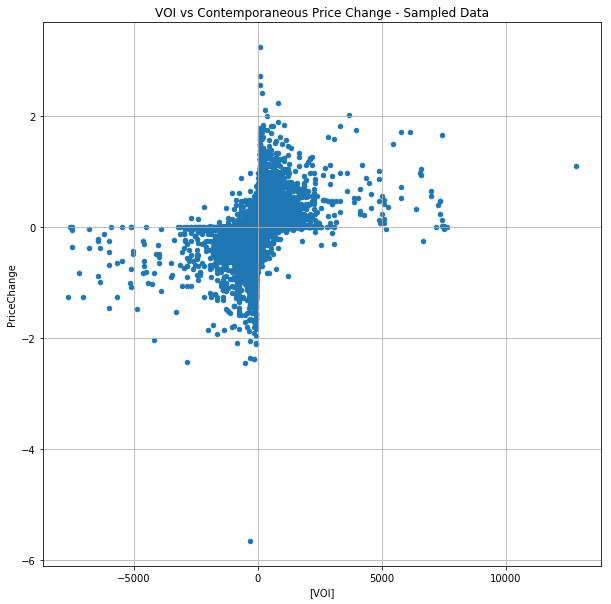

In [35]:
#Analyze relation with Mt, where Mt is the mid point price
data['Mt'] = (data['Bid Price'] +data['Ask Price'])/2.
resampledDF['Mt'] = (resampledDF['Bid Price'] +resampledDF['Ask Price'])/2.
resampledDF['DeltaMt'] = resampledDF['Mt'].diff()
resampledDF.plot(x = ['VOI'], y = ['DeltaMt'], kind = 'scatter', grid = True, figsize = (10,10))
plt.ylabel('PriceChange')
plt.title('VOI vs Contemporaneous Price Change - Sampled Data')
plt.show()


The relationship is evident here, a positive regression slope is strong suspect. Next we do the regression to see what is going on.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DeltaMt   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     7565.
Date:                Tue, 08 May 2018   Prob (F-statistic):               0.00
Time:                        11:25:10   Log-Likelihood:                 7609.7
No. Observations:               44878   AIC:                        -1.522e+04
Df Residuals:                   44876   BIC:                        -1.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.001     -1.999      0.046      -0.004   -3.78e-05
VOI            0.0002   2.21e-06     86.977      0.000       0.000       0.000
==============================================================================
Omnibus:                    15771.481   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2135633.610
Skew:                          -0.637   Prob(JB):                         0.00
Kurtosis:                      36.771   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

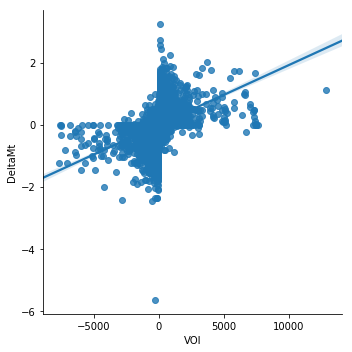

In [36]:
#Regression Analysis
import statsmodels.api as sm
import seaborn as sns
resampledDF.dropna(inplace=True)
X = pd.DataFrame(resampledDF.VOI, index = resampledDF.index)
X = sm.add_constant(X) ## add an intercept (beta_0) to our model
y = resampledDF["DeltaMt"] 

# Calibrate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

#Plot the regression line as well alongside the data
import statsmodels.api as sm
sns.lmplot(x='VOI',y='DeltaMt',data=resampledDF,fit_reg=True) 


Corresponds to Figure 2.2 of paper
R^2 observed here is almost similar to that observed in the paper. 

Next we add the other two Volume Imbalance Indicators mentioned in the paper and reproduce the results.

In [38]:
100.*sum(resampledDF.DeltaMt == 0)/len(resampledDF)


64.5015375016712

Change in Mid Price is non-zero for only 36% of the cases

In [183]:
#Add OIR to both resampled and original data, compute the autocorrelation Structures
data['OIR'] = (data['Bid Quantity'] - data['Ask Quantity'])/(data['Bid Quantity'] + data['Ask Quantity'])
resampledDF['OIR'] = (resampledDF['Bid Quantity'] - resampledDF['Ask Quantity'])/(resampledDF['Bid Quantity'] + resampledDF['Ask Quantity'])
data['DeltaOIR'] = data['OIR'].diff()
resampledDF['DeltaOIR'] = resampledDF['OIR'].diff()

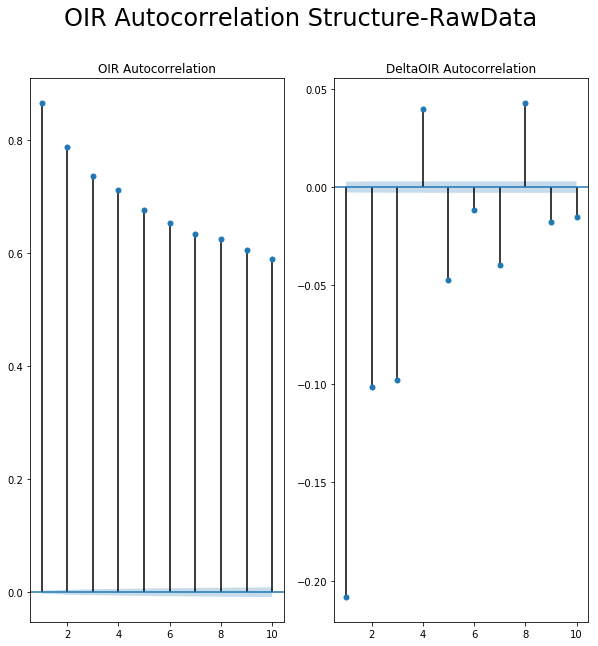

In [18]:
##ACF function for the OIR-RawData
data.dropna(inplace=True)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1, figsize=(10,10))

ax1 = plt.subplot(121)
a=plot_acf(data.OIR, ax = ax1, lags = np.arange(1,11), \
        title = 'OIR Autocorrelation')


ax2 = plt.subplot(122)
a=plot_acf(data.DeltaOIR, ax = ax2, lags = np.arange(1,11), \
        title = 'DeltaOIR Autocorrelation')

a=plt.suptitle('OIR Autocorrelation Structure-RawData', fontsize = 24)

plt.show()

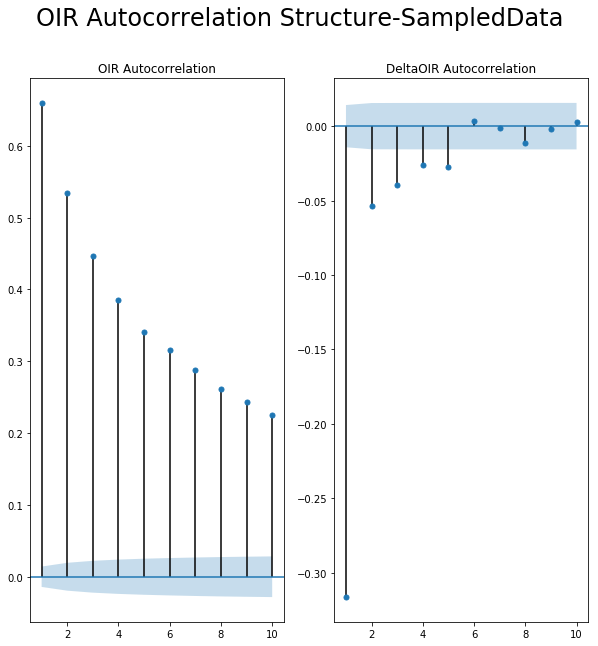

In [19]:
##ACF function for the OIR-ResampledData
resampledDF.dropna(inplace=True)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1, figsize=(10,10))

ax1 = plt.subplot(121)
a=plot_acf(resampledDF.OIR, ax = ax1, lags = np.arange(1,11), \
        title = 'OIR Autocorrelation')


ax2 = plt.subplot(122)
a=plot_acf(resampledDF.DeltaOIR, ax = ax2, lags = np.arange(1,11), \
        title = 'DeltaOIR Autocorrelation')

a=plt.suptitle('OIR Autocorrelation Structure-SampledData', fontsize = 24)

plt.show()

Much stronger relationship than that seen in the paper on lag-1. DeltaOIR shows similar negative AC on lag1 as in paper

Text(0.5,1,u'VWAP of Resampled Data')

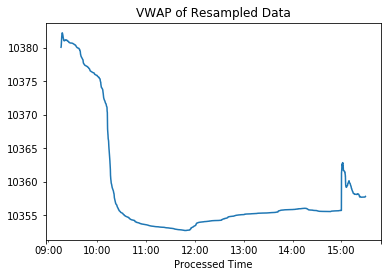

In [42]:
resampledDF.VWAP.iloc[10:].plot()
plt.title('VWAP of Resampled Data')

In [115]:
#Calculate the next indicator, we need TurnOver value for that 
data['TurnOver'] = data['VWAP']*data['TTQ']
resampledDF['TurnOver'] = resampledDF['VWAP']*resampledDF['TTQ']

resampledDF['TPt'] = 0
data['TPt'] = 0
resampledDF.loc[resampledDF.index[0] ,'TPt'] = resampledDF['Mt'].iloc[0]

#Have to use for loop, not Happy!
for i in range(1, len(resampledDF)):
    if resampledDF.loc[resampledDF.index[i], 'TTQ'] == resampledDF.loc[resampledDF.index[i-1], 'TTQ']:
        resampledDF.loc[resampledDF.index[i], 'TPt'] = resampledDF.loc[resampledDF.index[i-1], 'TPt']
    else:
        resampledDF.loc[resampledDF.index[i],'TPt'] = (resampledDF.loc[resampledDF.index[i],'TTV']-resampledDF.loc[resampledDF.index[i-1],'TTV'])/\
                                                (resampledDF.loc[resampledDF.index[i],'TTQ']-resampledDF.loc[resampledDF.index[i-1],'TTQ'])


Text(0.5,1,u'Difference between TPt metric and LTP')

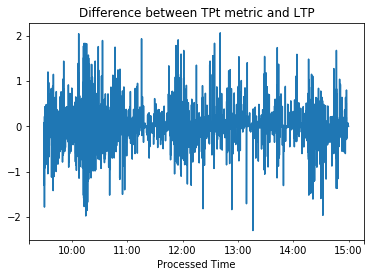

In [125]:
temp = resampledDF['TPt'] - resampledDF['LTP']
temp.plot()
plt.title('Difference between TPt metric and LTP')

Text(0.5,1,u'Plot of Rt')

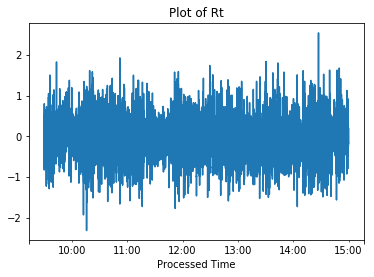

In [124]:
#Now calculate the Rt metric
resampledDF['Rt'] = 0
resampledDF['Rt'] = resampledDF.TPt - (resampledDF.Mt +resampledDF.Mt.shift())/2.

# There is an error in the data value of VWAP at 15:00 , we don't want to trade the last 30 mins and the 
# first 15 mins
openTime  = datetime.time(9,30,00)
closeTime = datetime.time(15,00,00)
resampledDF = resampledDF[(resampledDF.TempTime >= openTime)&(resampledDF.TempTime < closeTime)]

resampledDF.Rt.plot()
plt.title('Plot of Rt')

Next we have to check whether the Rt process is stationary- we perform the same check as has been performed in the paper (Fig 3.2)

Text(0.5,1,u'Variance Ratio Test for different values of k')

Text(0,0.5,u'Ratio of Variances')

Text(0.5,0,u'Value of k')

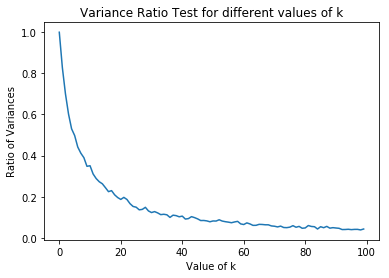

In [163]:
import matplotlib.pyplot as plt
ratio = []
for i in range(1,101):
    num = np.var(resampledDF['Rt'].iloc[::i].diff().dropna().tolist())
    den =i*np.var(resampledDF['Rt'].iloc[::1].diff().dropna().tolist())
    ratio.append(num/den)

plt.plot(ratio)
plt.title('Variance Ratio Test for different values of k')
plt.ylabel('Ratio of Variances')
plt.xlabel('Value of k')
plt.show()

Declining values of ratio test confirm the fact that the proces Rt is mean reverting

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AveragePriceChange   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     70.13
Date:                Tue, 08 May 2018   Prob (F-statistic):           5.72e-17
Time:                        18:10:24   Log-Likelihood:                -35789.
No. Observations:               39579   AIC:                         7.158e+04
Df Residuals:                   39577   BIC:                         7.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.003     -0.775      0.438      -0.008       0.004
Rt             0.0543      0.006      8.375      0.000       0.042       0.067
==============================================================================
Omnibus:                     4487.136   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38243.490
Skew:                          -0.211   Prob(JB):                         0.00
Kurtosis:                       7.797   Cond. No.                         2.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

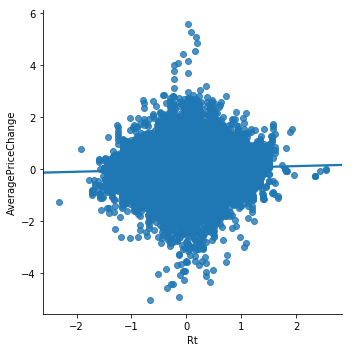

In [171]:
# Build Average Price Change metric that corresponds to return over the next 20 periods
# 20 periods
resampledDF['AveragePriceChange'] = resampledDF['Mt'].rolling(20).mean().shift(-20) - resampledDF['Mt']

#Regression Analysis
resampledDF.dropna(inplace=True)
X = pd.DataFrame(resampledDF.Rt, index = resampledDF.index)
X = sm.add_constant(X) ## add an intercept (beta_0) to our model
y = resampledDF["AveragePriceChange"] 

# Calibrate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

#Plot the regression line as well alongside the data
sns.lmplot(x='Rt',y='AveragePriceChange',data=resampledDF,fit_reg=True) 

[Figure 3.3] Though it's difficult to spot here, the regression points to a significant positive relationship between the average price change over the next specified(20) periods

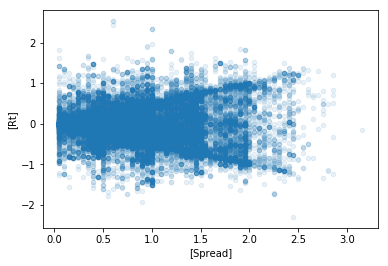

In [173]:
#Plot the relationships with the bid-ask spread
resampledDF['Spread'] = resampledDF['Ask Price'] - resampledDF['Bid Price']
resampledDF.plot(x=['Spread'], y=['Rt'], kind='scatter', alpha = 0.1)

[Figure 3.4] Can't say much based on this relationship

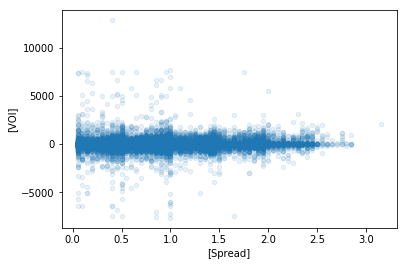

In [177]:
resampledDF.plot(x=['Spread'], y=['VOI'], kind='scatter', alpha = 0.1)

[Figure 3.5] Again, here we can't say anything based on the graph. Though it does seem that larger volume imbalances are accompanies by smaller spreads and vice-versa.

In [178]:
#Run the final Regression model on which trading is based on
resampledDF.columns.values

array([u'EsteeId', u'LTP', u'LTQ', u'LTT', u'Bid Price', u'Bid Quantity',
       u'Ask Price', u'Ask Quantity', u'Bid Price 2', u'Bid Quantity 2',
       u'Ask Price 2', u'Ask Quantity 2', u'Bid Price 3',
       u'Bid Quantity 3', u'Ask Price 3', u'Ask Quantity 3',
       u'Bid Price 4', u'Bid Quantity 4', u'Ask Price 4',
       u'Ask Quantity 4', u'Bid Price 5', u'Bid Quantity 5',
       u'Ask Price 5', u'Ask Quantity 5', u'VWAP', u'System Time', u'TTQ',
       u'ATP', u'TTV', u'TBQ', u'TSQ', u'OI', u'Processed Time',
       u'TickType', u'MsgType', u'BCSequence Number', u'Receive Counter',
       u'Publish Counter', u'Receive by DL Counter', u'BidAskChange Flag',
       'TempTime', 'deltaVtB', 'deltaVtA', 'VOI', 'DeltaVOI', 'Mt',
       'DeltaMt', 'TurnOver', 'TPt', 'Rt', 'AveragePriceChange', 'Spread'],
      dtype=object)

In [228]:
#Run the final Regression model on which trading is based on
resampledDF['VOI0'] = resampledDF['VOI']/resampledDF['Spread']
resampledDF['OIR0'] = resampledDF['OIR']/resampledDF['Spread']
resampledDF['R0']   = resampledDF['Rt']/resampledDF['Spread']
VOIFeatureList = ['VOI0']
OIRFeatureList = ['OIR0']
for i in range(1,6):
    VOIString = 'VOI' + str(i)
    OIRString = 'OIR' + str(i)
    VOIFeatureList.append(VOIString)
    OIRFeatureList.append(OIRString)
    resampledDF[VOIString] = resampledDF['VOI'].shift(i)/resampledDF['Spread']
    resampledDF[OIRString] = resampledDF['OIR'].shift(i)/resampledDF['Spread']

#Run the regression now
#Regression Analysis
featureList = VOIFeatureList
featureList.extend(OIRFeatureList)
featureList.append('R0')
resampledDF.dropna(inplace=True)
X = resampledDF[featureList]
X = sm.add_constant(X) ## add an intercept (beta_0) to our model
y = resampledDF["AveragePriceChange"] 

# Calibrate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AveragePriceChange   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.50
Date:                Wed, 09 May 2018   Prob (F-statistic):           1.17e-81
Time:                        22:57:59   Log-Likelihood:                -35607.
No. Observations:               39564   AIC:                         7.124e+04
Df Residuals:                   39550   BIC:                         7.136e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.003     -1.147      0.251      -0.009       0.002
VOI0        1.118e-05   1.33e-06      8.410      0.000    8.58e-06    1.38e-05
VOI1        1.024e-05   1.42e-06      7.213      0.000    7.46e-06     1.3e-05
VOI2        8.083e-06   1.41e-06      5.730      0.000    5.32e-06    1.08e-05
VOI3        7.346e-06   1.37e-06      5.356      0.000    4.66e-06       1e-05
VOI4        6.771e-06   1.64e-06      4.138      0.000    3.56e-06    9.98e-06
VOI5        7.986e-06   1.59e-06      5.012      0.000    4.86e-06    1.11e-05
OIR0          -0.0013      0.002     -0.621      0.535      -0.006       0.003
OIR1          -0.0053      0.003     -2.056      0.040      -0.010      -0.000
OIR2          -0.0041      0.003     -1.535      0.125      -0.009       0.001
OIR3          -0.0043      0.003     -1.620      0.105      -0.010       0.001
OIR4          -0.0016      0.003     -0.615      0.539      -0.007       0.004
OIR5          -0.0012      0.002     -0.576      0.565      -0.005       0.003
R0             0.0111      0.003      4.335      0.000       0.006       0.016
==============================================================================
Omnibus:                     4278.089   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34229.516
Skew:                          -0.201   Prob(JB):                         0.00
Kurtosis:                       7.539   Cond. No.                     2.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value is extremely small. VOI coefficients are significant across all lags considered, same can't be said for OIR coefficients. Rt/S feature is statistically significant as well.

Exporing the state of residuals below.

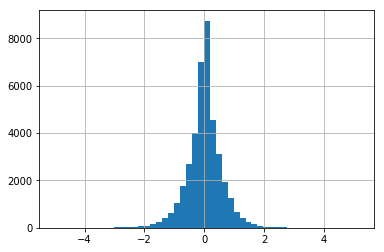

In [230]:
residuals = resampledDF["AveragePriceChange"] -  predictions
residuals.hist(bins=51)

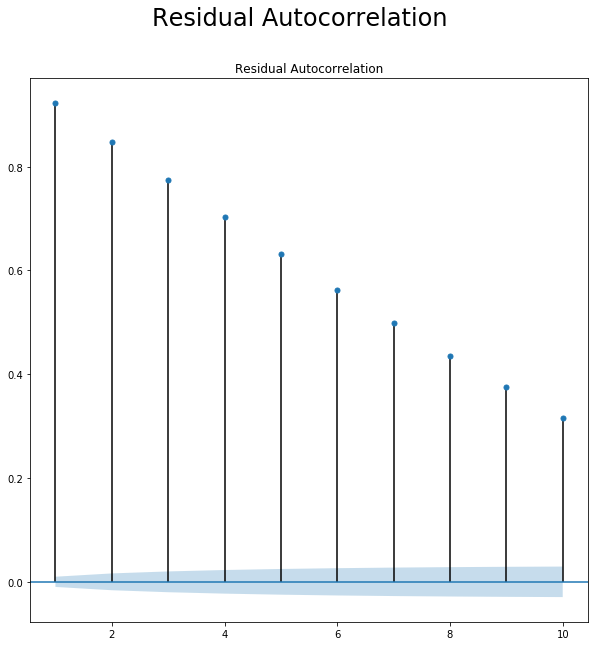

In [233]:
##ACF function for the OIR-ResampledData
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1, figsize=(10,10))

ax1 = plt.subplot(111)
a=plot_acf(residuals, ax = ax1, lags = np.arange(1,11), \
        title = 'Residual Autocorrelation')

a=plt.suptitle('Residual Autocorrelation', fontsize = 24)

plt.show()

In [189]:
#Try to simulate a trading run 
inSample  = resampledDF.iloc[:int(len(resampledDF)/2)]
outSample = resampledDF.iloc[int(len(resampledDF)/2):]

#The idea is to train the model on the inSample and then use the model to trade on the outSample
XinSample = resampledDF[featureList].iloc[:int(len(resampledDF)/2)]
XinSample = sm.add_constant(XinSample) ## add an intercept (beta_0) to our model
y = resampledDF["AveragePriceChange"] .iloc[:int(len(resampledDF)/2)]

# Calibrate
model = sm.OLS(y, XinSample).fit() ## sm.OLS(output, input)
predictions = model.predict(XinSample)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     AveragePriceChange   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.58
Date:                Wed, 09 May 2018   Prob (F-statistic):           6.55e-60
Time:                        01:07:03   Log-Likelihood:                -19582.
No. Observations:               19787   AIC:                         3.919e+04
Df Residuals:                   19773   BIC:                         3.930e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.005     -0.955      0.340      -0.014       0.005
VOI0         1.19e-05   1.68e-06      7.091      0.000    8.61e-06    1.52e-05
VOI1        1.084e-05   1.79e-06      6.044      0.000    7.32e-06    1.44e-05
VOI2        8.416e-06    1.8e-06      4.670      0.000    4.88e-06    1.19e-05
VOI3         7.92e-06   1.76e-06      4.492      0.000    4.46e-06    1.14e-05
VOI4         1.18e-05   2.31e-06      5.116      0.000    7.28e-06    1.63e-05
VOI5        1.199e-05   2.07e-06      5.784      0.000    7.93e-06    1.61e-05
OIR0          -0.0053      0.003     -1.924      0.054      -0.011    9.96e-05
OIR1          -0.0026      0.003     -0.796      0.426      -0.009       0.004
OIR2          -0.0042      0.003     -1.236      0.216      -0.011       0.002
OIR3          -0.0060      0.003     -1.762      0.078      -0.013       0.001
OIR4          -0.0035      0.003     -1.029      0.303      -0.010       0.003
OIR5          -0.0008      0.003     -0.277      0.782      -0.006       0.005
R0             0.0111      0.004      2.834      0.005       0.003       0.019
==============================================================================
Omnibus:                     2414.431   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11437.217
Skew:                          -0.511   Prob(JB):                         0.00
Kurtosis:                       6.582   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

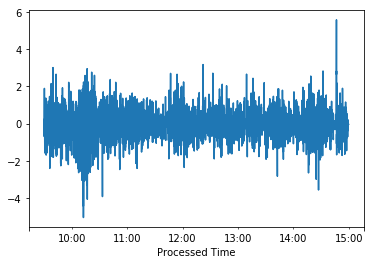

In [216]:
resampledDF.AveragePriceChange.plot()

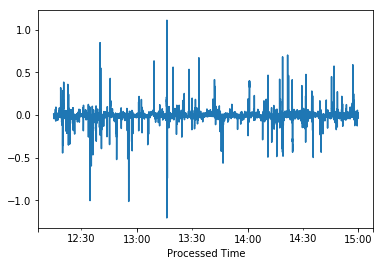

In [191]:
#Predictions on outSampledData
#The idea is to train the model on the inSample and then use the model to trade on the outSample
XoutSample = resampledDF[featureList].iloc[int(len(resampledDF)/2):]
XoutSample = sm.add_constant(XoutSample) ## add an intercept (beta_0) to our model
#Get the predictions
predictions = model.predict(XoutSample)
predictions.plot()

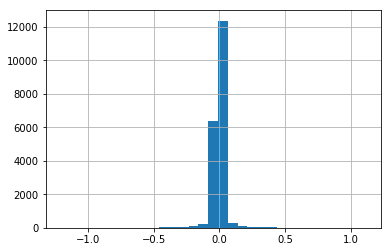

In [194]:
predictions.hist(bins=31)

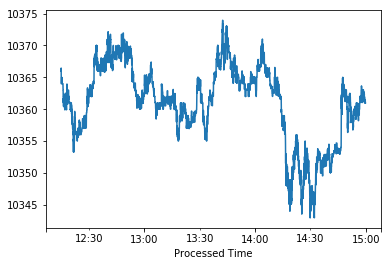

In [196]:
outSample.LTP.plot()

In [214]:
tradeSimulation = outSample[['Mt', 'Bid Price', 'Ask Price']]
tradeSimulation['Prediction'] =predictions
tradeSimulation['PositionOn'] = False
tradeColumnValues = ['Time', 'Side', 'Entry Price', 'Exit Price']
trades = pd.DataFrame([], columns = tradeColumnValues)
for i in range(len(outSample) -20):
    if tradeSimulation.iloc[i]['Prediction'] > 0.2 and tradeSimulation.iloc[i]['PositionOn'] == False:
        for j in range(20):
            tradeSimulation.loc[tradeSimulation.index[i+j], 'PositionOn'] = True
        entryPrice = tradeSimulation.iloc[i]['Ask Price']
        exitPrice  = tradeSimulation.iloc[i+20]['Bid Price']
        tradeTime  = tradeSimulation.index[i]
        tempDF = pd.DataFrame([[tradeTime, 'Long', entryPrice, exitPrice]], columns = tradeColumnValues)
        trades = trades.append(tempDF)
    if tradeSimulation.iloc[i]['Prediction'] < -0.2 and tradeSimulation.iloc[i]['PositionOn'] == False:
        for j in range(20):
            tradeSimulation.loc[tradeSimulation.index[i+j], 'PositionOn'] = True
        entryPrice = tradeSimulation.iloc[i]['Bid Price']
        exitPrice  = tradeSimulation.iloc[i+20]['Ask Price']
        tradeTime  = tradeSimulation.index[i]
        tempDF = pd.DataFrame([[tradeTime, 'Short', entryPrice, exitPrice]], columns = tradeColumnValues)
        trades = trades.append(tempDF)

trades['Return'] = 0
trades['Return'] = ( trades['Exit Price'] -trades['Entry Price'])/ trades['Entry Price']
trades['Return'] = -trades['Return']*(trades['Side'] == 'Short') + trades['Return']*(trades['Side'] == 'Long')    

In [215]:
trades.to_csv('Trades1.csv')

In [213]:
sum(predictions<-0.1)

397

Trying the simulation for a look ahead of 5 periods, i.e. 2.5 seconds. Remains to be seen if this fairs well than the attempt to predict over 20 steps ahead(10 seconds)

In [217]:
# Build Average Price Change metric that corresponds to return over the next 20 periods
# 20 periods
resampledDF['AveragePriceChange5'] = resampledDF['Mt'].rolling(5).mean().shift(-5) - resampledDF['Mt']
#Run the regression now
#Regression Analysis
resampledDF.dropna(inplace=True)
X = resampledDF[featureList]
X = sm.add_constant(X) ## add an intercept (beta_0) to our model
y = resampledDF["AveragePriceChange5"] 

# Calibrate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     AveragePriceChange5   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     22.26
Date:                 Wed, 09 May 2018   Prob (F-statistic):           6.52e-54
Time:                         21:36:56   Log-Likelihood:                -11918.
No. Observations:                39569   AIC:                         2.386e+04
Df Residuals:                    39555   BIC:                         2.398e+04
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.547      0.584      -0.004       0.002
VOI0        5.572e-06   7.31e-07      7.626      0.000    4.14e-06       7e-06
VOI1            4e-06    7.8e-07      5.127      0.000    2.47e-06    5.53e-06
VOI2        3.652e-06   7.75e-07      4.711      0.000    2.13e-06    5.17e-06
VOI3         2.24e-06   7.54e-07      2.972      0.003    7.63e-07    3.72e-06
VOI4        2.488e-06   8.99e-07      2.767      0.006    7.25e-07    4.25e-06
VOI5        3.832e-06   8.75e-07      4.377      0.000    2.12e-06    5.55e-06
OIR0           0.0063      0.001      5.400      0.000       0.004       0.009
OIR1          -0.0043      0.001     -3.049      0.002      -0.007      -0.002
OIR2          -0.0020      0.001     -1.366      0.172      -0.005       0.001
OIR3          -0.0011      0.001     -0.754      0.451      -0.004       0.002
OIR4          -0.0009      0.001     -0.616      0.538      -0.004       0.002
OIR5          -0.0026      0.001     -2.157      0.031      -0.005      -0.000
R0             0.0060      0.001      4.222      0.000       0.003       0.009
==============================================================================
Omnibus:                     8676.634   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           252338.787
Skew:                          -0.399   Prob(JB):                         0.00
Kurtosis:                      15.346   Cond. No.                     2.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Get the predictions
predictions = model.predict(XoutSample)

#Simulate the trades over the outSample data
tradeSimulation = outSample[['Mt', 'Bid Price', 'Ask Price']]
tradeSimulation['Prediction'] =predictions
tradeSimulation['PositionOn'] = False
tradeColumnValues = ['Time', 'Side', 'Entry Price', 'Exit Price']
trades = pd.DataFrame([], columns = tradeColumnValues)
for i in range(len(outSample) -5):
    if tradeSimulation.iloc[i]['Prediction'] > 0.2 and tradeSimulation.iloc[i]['PositionOn'] == False:
        for j in range(20):
            tradeSimulation.loc[tradeSimulation.index[i+j], 'PositionOn'] = True
        entryPrice = tradeSimulation.iloc[i]['Ask Price']
        exitPrice  = tradeSimulation.iloc[i+20]['Bid Price']
        tradeTime  = tradeSimulation.index[i]
        tempDF = pd.DataFrame([[tradeTime, 'Long', entryPrice, exitPrice]], columns = tradeColumnValues)
        trades = trades.append(tempDF)
    if tradeSimulation.iloc[i]['Prediction'] < -0.2 and tradeSimulation.iloc[i]['PositionOn'] == False:
        for j in range(20):
            tradeSimulation.loc[tradeSimulation.index[i+j], 'PositionOn'] = True
        entryPrice = tradeSimulation.iloc[i]['Bid Price']
        exitPrice  = tradeSimulation.iloc[i+20]['Ask Price']
        tradeTime  = tradeSimulation.index[i]
        tempDF = pd.DataFrame([[tradeTime, 'Short', entryPrice, exitPrice]], columns = tradeColumnValues)
        trades = trades.append(tempDF)

trades['Return'] = 0
trades['Return'] = ( trades['Exit Price'] -trades['Entry Price'])/ trades['Entry Price']
trades['Return'] = -trades['Return']*(trades['Side'] == 'Short') + trades['Return']*(trades['Side'] == 'Long')    

In [219]:
preditions = model.predict(resampledDF[])

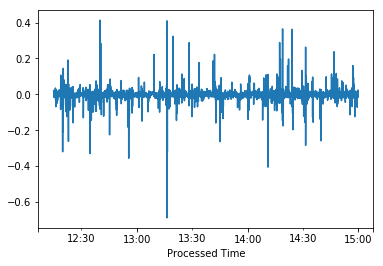

In [220]:
predictions.plot()